# Steroids or Pentoxifylline for severe Alcoholic Hepatitis (STOPAH) trial


## Computation of Sobol indices and Shapley effects/values 


#### Implementation of Shapley values, Sobol indices and Shapley effects to prognostic scoring 

### MELD score

Model for End-Stage Liver Disease (MELD) score

\begin{equation}
\begin{array}{r}
\text { MELD }=(0.957 \times \ln (\text { creatinine }(\mathrm{mg} / \mathrm{dL})))+(0.378 \times \ln (\text { bilirubin }(\mathrm{mg} / \mathrm{dL})))+ \\
(1.120 \times \ln (\mathrm{INR}))+(0.643 \times \text { aetiology })
\end{array}
\end{equation}

A modification for large MELD Scores is 

\begin{equation}
\text { MELD-Na }=\left\{\begin{array}{ll}
\text { MELD }+1.32 \times(137-\text { sodium })-0.033 \times \text { MELD } \times(137-\text { sodium }), & \text { if MELD }>11 \\
\text { MELD }, & \text { otherwise }
\end{array}\right.
\end{equation}

### Lille Score 

\begin{equation}
\begin{array}{r}
\mathrm{R}=3.19-(0.101 \times \text { age }(\text { years }))+(0.147 \times \text { albumin }(\mathrm{g} / \mathrm{L}))+(0.0165 \times \Delta \text { bilirubin })- \\
(0.206 \times \text { renal insufficiency }(0 \text { or } 1))-(0.0065 \times \text { day } 0 \text { bilirubin }(\mu \mathrm{mol} / \mathrm{L}))- \\
(0.0096 \times \text { prothrombin time }(\text { seconds }))
\end{array}
\end{equation}

When is a patient considered for a liver transplant:

1. Lille Score > 0.45

2. MELT Score 

3. Chronic Liver Failure Consortium acute-on-chronic liver failure (CLIF-C ACLF) score of ≥ 70

As these scores are linear combinations of the values, the Shapley values are simply each term. 

In [1]:
#from loaddata import stopah
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/jlm217/rds/rds-mrc-bsu-csoP2nj6Y6Y/mimah/stopah/stopah/data/stopah.csv')

### Meld score

We comence with the MELD score 

\begin{equation}
\begin{array}{r}
\text { MELD }=(0.957 \times \ln (\text { creatinine }(\mathrm{mg} / \mathrm{dL})))+(0.378 \times \ln (\text { bilirubin }(\mathrm{mg} / \mathrm{dL})))+ \\
(1.120 \times \ln (\mathrm{INR})),
\end{array}
\end{equation}

where a remainder term is equal to 0, as the disease is alcoholic. 

In [3]:
#Compute MELT Score 

df['MELT'] = 0.957 *np.log(df['Creatinine...Merged']) + 0.378 * np.log(df['Bilirubin.Merged']) + 1.120 * np.log(df['INR...Merged.clinical.and.calc'])

/home/jlm217/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

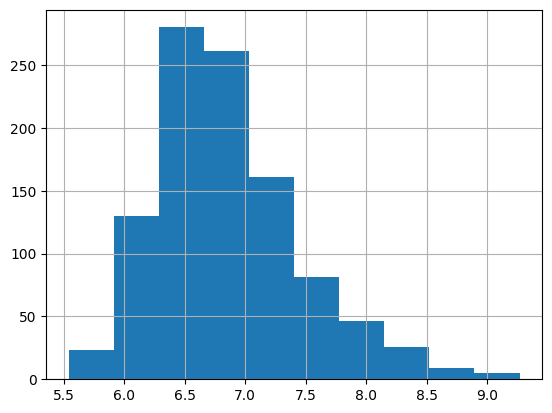

In [4]:
df['MELT'].hist()

### Look for correlation in the data 

#### Mostly, low correlation close to zero, expect between 'Bilirubin' and 'Creatinine'

Be careful when computing Sobol indices and Shapley effects 

In [5]:
df[['Bilirubin.Merged','Creatinine...Merged']].corr()

Bilirubin.Merged  Creatinine...Merged
Bilirubin.Merged             1.000000             0.149467
Creatinine...Merged          0.149467             1.000000

In [6]:
df[['Creatinine...Merged','INR...Merged.clinical.and.calc']].corr() #close to uncorrelated 

Creatinine...Merged  \
Creatinine...Merged                        1.000000   
INR...Merged.clinical.and.calc            -0.009274   

                                INR...Merged.clinical.and.calc  
Creatinine...Merged                                  -0.009274  
INR...Merged.clinical.and.calc                        1.000000

In [7]:
df[['Bilirubin.Merged','INR...Merged.clinical.and.calc']].corr() #low correlation 

Bilirubin.Merged  \
Bilirubin.Merged                        1.000000   
INR...Merged.clinical.and.calc          0.015493   

                                INR...Merged.clinical.and.calc  
Bilirubin.Merged                                      0.015493  
INR...Merged.clinical.and.calc                        1.000000

### Simple computation of Sobol indices

\begin{equation}
\underline{\tau}_S^2=\frac{\operatorname{Var}\left\{\mathrm{E}\left(Y \mid \mathbf{X}_{S}\right)\right\}}{\operatorname{Var}(Y)}=\frac{\mathrm{E}\left[\left\{\mathrm{E}\left(Y \mid \mathbf{X}_S\right)\right\}^2\right]-\{\mathrm{E}(Y)\}^2}{\operatorname{Var}(Y)}
\end{equation}

In [8]:
#Simulation of independent copies: Pick-freeze 

var_y = np.var(df['MELT'])
e_y = np.mean(df['MELT'])

In [9]:
a = (0.957 *np.log(df['Creatinine...Merged']))**2

/home/jlm217/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
b = (np.mean(0.378 * np.log(df['Bilirubin.Merged']) + 1.120 * np.log(df['INR...Merged.clinical.and.calc'])))**2

In [11]:
singleton = np.mean(a)

In [12]:
e_y

6.854339962497348

In [13]:
singleton

16.760273762528477

In [14]:
Sobol_1 = (singleton - (e_y)**2 )
Sobol_1 

-30.22170255895967

In [17]:
import scipy.stats as stats
kde = stats.gaussian_kde(np.log(df['Bilirubin.Merged']).dropna())

In [18]:
kde

In [22]:
xs = np.linspace(-3, 3, num=500)
y = kde(xs)